## 단원별 심화 연습 문제

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# set floating point formatting
pd.options.display.float_format = '{:,.4f}'.format

### Q6

**범위**
- (이전 범위 포함)
- 시각화

`rental.csv` 파일을 로드하여 다음의 지시사항에 맞는 시각화 그래프를 생성하고 출력합니다.

* **date** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
* **businessday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
* **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
* **season** - 계절. 봄, 여름, 가을, 겨울 순으로 표현합니다.
* **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 맑은 날씨
    * 2: 약간의 안개와 구름이 끼어있는 날씨
    * 3: 약간의 눈, 비가 오거나 천둥
    * 4: 아주 많은 비가 오거나 우박
* **humid** - 습도
* **wind** - 풍속
* **temp** - 온도
* **sense_temp** - 체감 온도
* **onetime** - 비회원의 공유킥보드 대여량.
* **membership** - 멤버십에 가입한 회원의 공유킥보드 대여량.
* **count** - 총 공유킥보드 대여랑. 비회원(onetime)과 멤버십 회원(membership)이 대여한 총 공유킥보드 대여량

In [2]:
# 데이터셋
rental = pd.read_csv('/mnt/elice/dataset/rental.csv')
rental.head()

,date,businessday,holiday,season,weather,humid,wind,temp,sense_temp,onetime,membership,count
0,2011-01-01 00:00:00,0,0,1,1,81,0.0,9.8,14.4,3,13,16
1,2011-01-01 01:00:00,0,0,1,1,80,0.0,9.0,13.6,8,32,40
2,2011-01-01 02:00:00,0,0,1,1,80,0.0,9.0,13.6,5,27,32
3,2011-01-01 03:00:00,0,0,1,1,75,0.0,9.8,14.4,3,10,13
4,2011-01-01 04:00:00,0,0,1,1,75,0.0,9.8,14.4,0,1,1


In [6]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10886 non-null  object 
 1   businessday  10886 non-null  int64  
 2   holiday      10886 non-null  int64  
 3   season       10886 non-null  int64  
 4   weather      10886 non-null  int64  
 5   humid        10886 non-null  int64  
 6   wind         10886 non-null  float64
 7   temp         10886 non-null  float64
 8   sense_temp   10886 non-null  float64
 9   onetime      10886 non-null  int64  
 10  membership   10886 non-null  int64  
 11  count        10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


`date` 컬럼의 월별 `temp`의 평균 온도를 bar 그래프로 생성합니다.

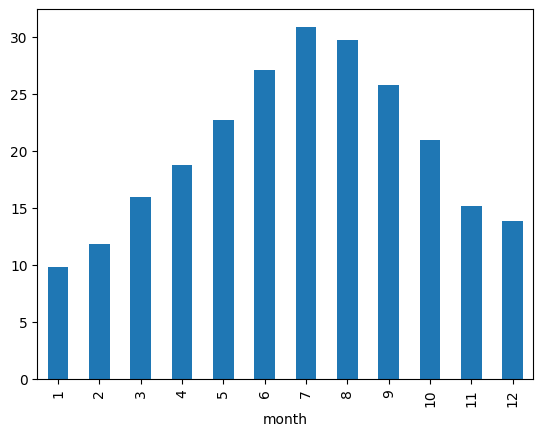

In [17]:
# 코드를 입력해 주세요
rental['date'] = pd.to_datetime(rental['date'])
rental['month'] = rental['date'].dt.month
rental.groupby('month')['temp'].mean().plot(kind = 'bar')
plt.show()

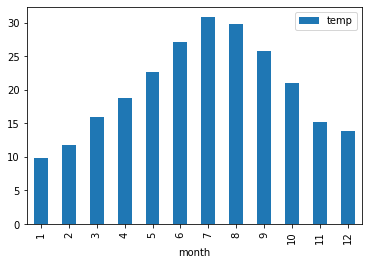

월별 `temp`의 평균 온도를 bar 그래프로 생성하되, 연도별로 분할하여 생성합니다.

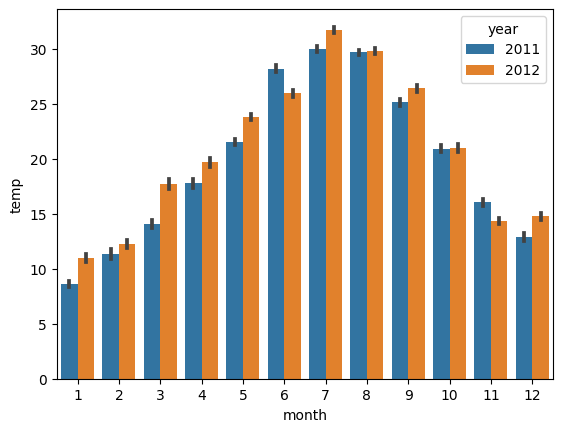

In [18]:
# 코드를 입력해 주세요
rental['year'] = rental['date'].dt.year
sns.barplot(x = 'month', y = 'temp', hue='year', data=rental)
plt.show()

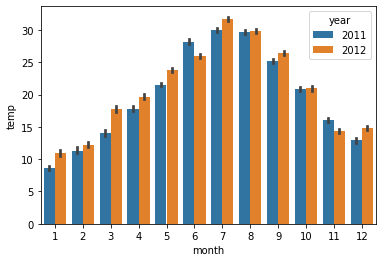

월별 `count`를 연도별로 비교 bar 그래프로 생성합니다. (이때 count는 열에 있는 count입니다.)

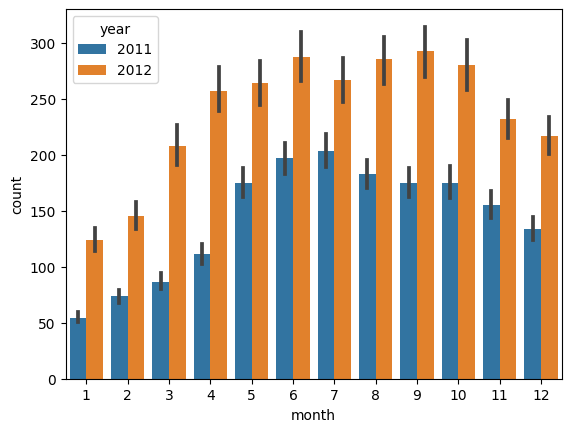

In [19]:
# 코드를 입력해 주세요
sns.barplot(x = 'month', y = 'count', hue = 'year', data = rental)
plt.show()

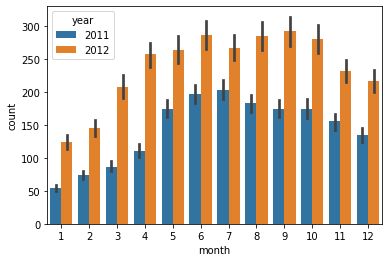

- 2011년도의 대여량(`count`)를 요일별 boxplot으로 시각화 합니다.
- 동일하게 2012년도의 대여량(`count`)를 요일별 boxplot으로 시각화 하여 비교합니다.

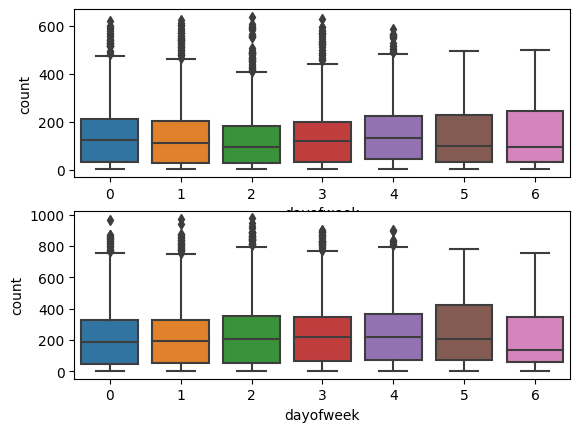

In [23]:
# 코드를 입력해 주세요
fig, axes = plt.subplots(2, 1)
rental['dayofweek'] = rental['date'].dt.dayofweek
sns.boxplot(x = 'dayofweek', y = 'count', data = rental.loc[rental['year'] == 2011], ax=axes[0])
sns.boxplot(x = 'dayofweek', y = 'count', data = rental.loc[rental['year'] == 2012], ax=axes[1])
plt.show()

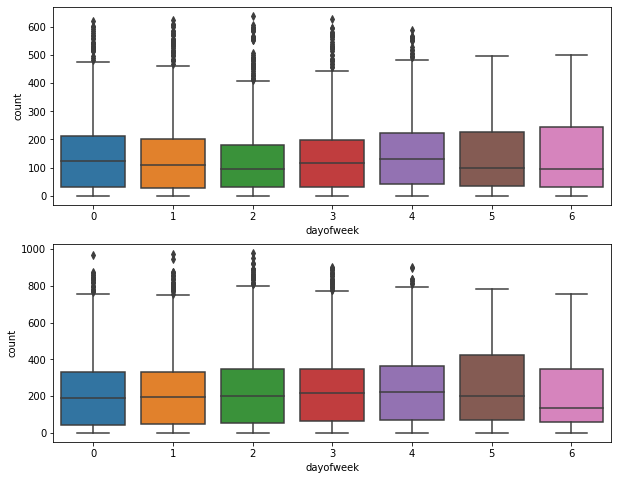

2011년도의 대여량(`count`)을 시간대(`hour`) / `dayofweek`로 나누어 `point plot`을 생성하세요

(실제 나누기가 아니라 시간대별로 dayofweek를 한번 더 세분화하라는 뜻입니다.)

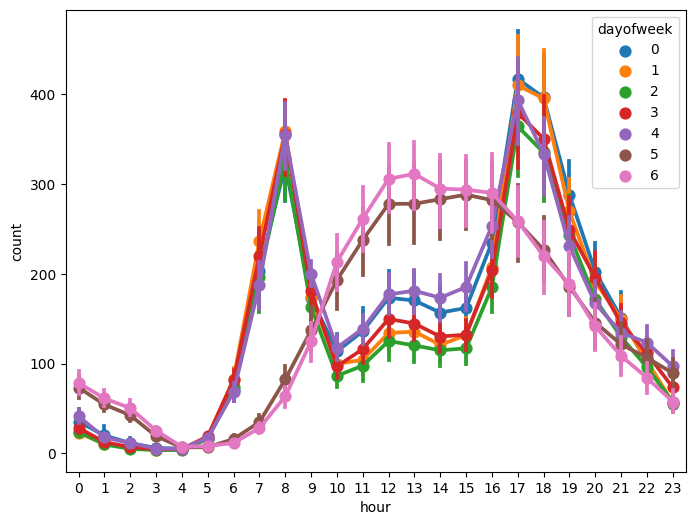

In [32]:
# 코드를 입력해 주세요
rental['hour'] = rental['date'].dt.hour
plt.figure(figsize = (8, 6))
sns.pointplot(x = 'hour', y = 'count', hue = 'dayofweek', data = rental.loc[rental['year'] == 2011])
plt.show()

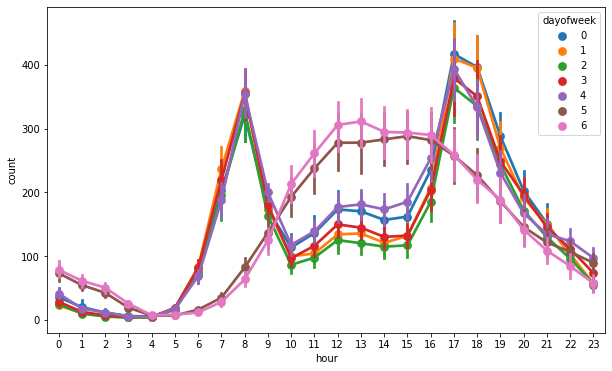

2012년도 데이터를 대상으로 `month`를 인덱스, `dayofweek`를 컬럼으로 갖는 `wind`에 대한 피벗테이블을 완성 후 다음의 히트맵을 출력하세요

- hint. 인덱스와 컬럼에 유의하세요
- hint. 컬러맵은 다음을 활용합니다. `cmap='coolwarm'`

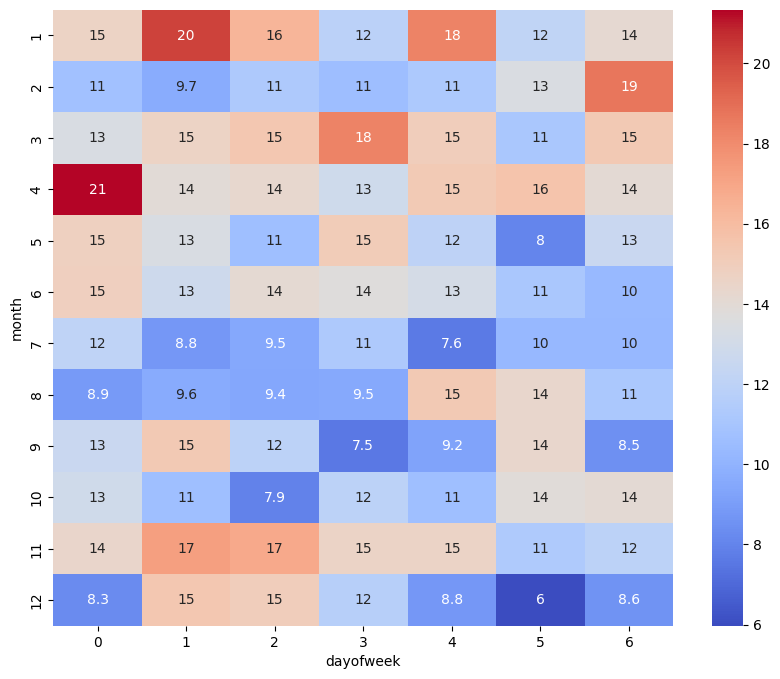

In [36]:
# 코드를 입력해 주세요
a = rental.loc[rental['year'] == 2012].pivot_table(index = 'month', columns = 'dayofweek', values = 'wind')
plt.figure(figsize = (10, 8))
sns.heatmap(a, annot = True, cmap = 'coolwarm')
plt.show()

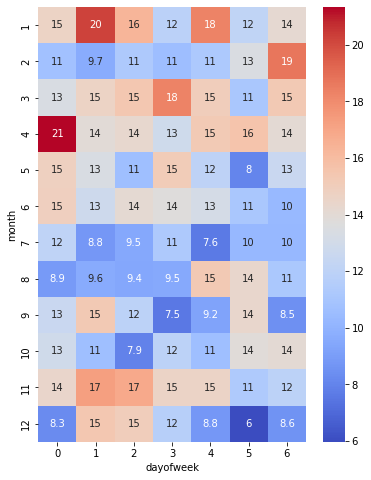

`rental` 데이터프레임에 대한 각 특성(feature)별 상관관계를 완성한 후 다음의 히트맵을 완성하세요.

- hint. 컬러맵은 다음을 활용합니다. `cmap='Greens'`

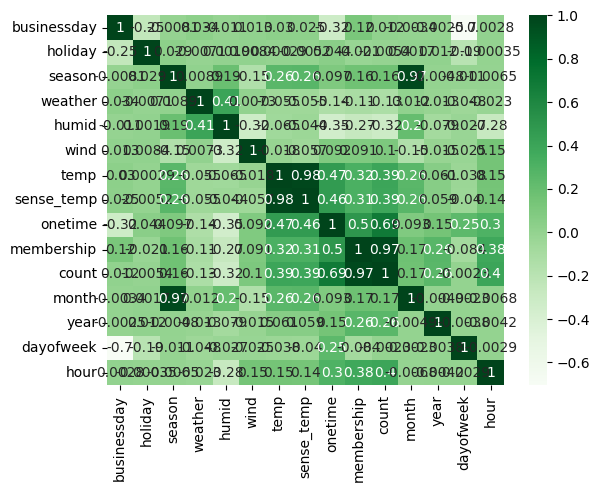

<Figure size 800x600 with 0 Axes>

In [47]:
# 코드를 입력해 주세요
sns.heatmap(rental.corr(),annot = True, cmap = 'Greens')
plt.figure(figsize=(8, 6))
plt.show()

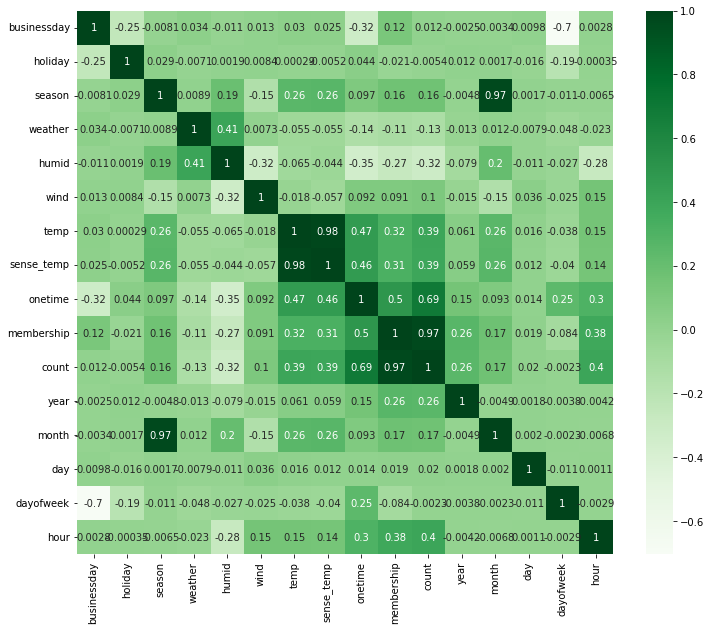

## 제출

제출을 위해 새로 불러온 `rental.csv` 데이터에서 2011년도의 대여량(`count`)을 시간대(`hour`) / `dayofweek`로 나누어 `point plot`을 그리세요.

In [ ]:
rental = pd.read_csv('/mnt/elice/dataset/rental.csv')
rental['date'] = pd.to_datetime(rental['date'])
rental['year'] = rental['date'].dt.year
rental['dayofweek'] = rental['date'].dt.dayofweek
rental['hour'] = rental['date'].dt.hour

plt.figure(figsize=(12, 6))

# TODO: 조건에 맞는 point plot을 그리세요.
sns.pointplot(x = 'hour', y = 'count', hue = 'dayofweek', data = rental.loc[rental['year'] == 2011])

# 이 아래를 수정하면 제대로 채점되지 않습니다.
plt.tight_layout()
plt.savefig('result.png')

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [49]:
import os

os.system('elice_grade result.png cds_ds_exercise.ipynb')

send files ['result.png', 'cds_ds_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 0.000000
Duration: 1.613 seconds
=== Message ===
제출 완료되었습니다.


0